In [2]:
import sys
sys.path.append("..")   


In [ ]:
import pandas as pd
import numpy as np
import torch
from tqdm import trange
import import_ipynb
from modelsAndFunctions.functions import *
import matplotlib.pyplot as plt
# from functions import *

In [ ]:
test_data_BS = pd.read_csv(r".\3DTensor-basedDL4OptionPricing\data_ipynb\test_data_BS.csv")
data_list = []
seq_len = 10

In [5]:
for i in trange(test_data_BS['optID'].unique().shape[0]):
    for index in range(test_data_BS.loc[(test_data_BS['optID'] == test_data_BS['optID'].unique()[i])].shape[0] - seq_len+1):
        tmp_data = np.array(test_data_BS.loc[(test_data_BS['optID'] == test_data_BS['optID'].unique()[i])][index:index+seq_len])
        data = torch.tensor(np.array(tmp_data[seq_len-1, :], dtype=np.float64())).unsqueeze(0)
        data_list.append(data)

100%|██████████| 228/228 [00:04<00:00, 51.34it/s]


In [6]:
test_data_BS = torch.cat(data_list, dim=0)
print("Shape of the Test Data BS:", test_data_BS.shape)

Shape of the Test Data BS: torch.Size([11386, 9])


In [7]:
BS_price = torch.zeros(size=(test_data_BS.shape[0], 1))

In [8]:
for i in trange(test_data_BS.shape[0]):
    maturity = test_data_BS[i, 3]
    vol = test_data_BS[i, 4]
    strike = test_data_BS[i, 5]
    spot = test_data_BS[i, 6]
    r = test_data_BS[i, 7]
    price = 0
    if test_data_BS[i, 2] == 0:
        price = call_option_pricer(spot, strike, maturity, r, vol)
    if test_data_BS[i, 2] == 1:
        price = put_option_pricer(spot, strike, maturity, r, vol)
    BS_price[i, :] = price

100%|██████████| 11386/11386 [00:03<00:00, 3164.82it/s]


In [9]:
BS_price = BS_price.squeeze()
test_price = test_data_BS[:, 8]

In [10]:
corr, map, mape = metrics(BS_price, test_price)
corr = torch.mean(corr).float()
map = torch.mean(map).float()
mape = torch.mean(mape).float()
mse = torch.mean(torch.square(test_price - BS_price)).float()
rmse = torch.sqrt(mse).float()

In [11]:
print("MSE: {:.5f}\nRMSE: {:0.5f}\nMAP: {:0.5f}\nMAPE: {:0.5f}\nCorrelation: {:0.5f}\n".format(mse, rmse, map, mape, corr))

MSE: 0.00082
RMSE: 0.02872
MAP: 0.02123
MAPE: 0.47957
Correlation: 0.99472



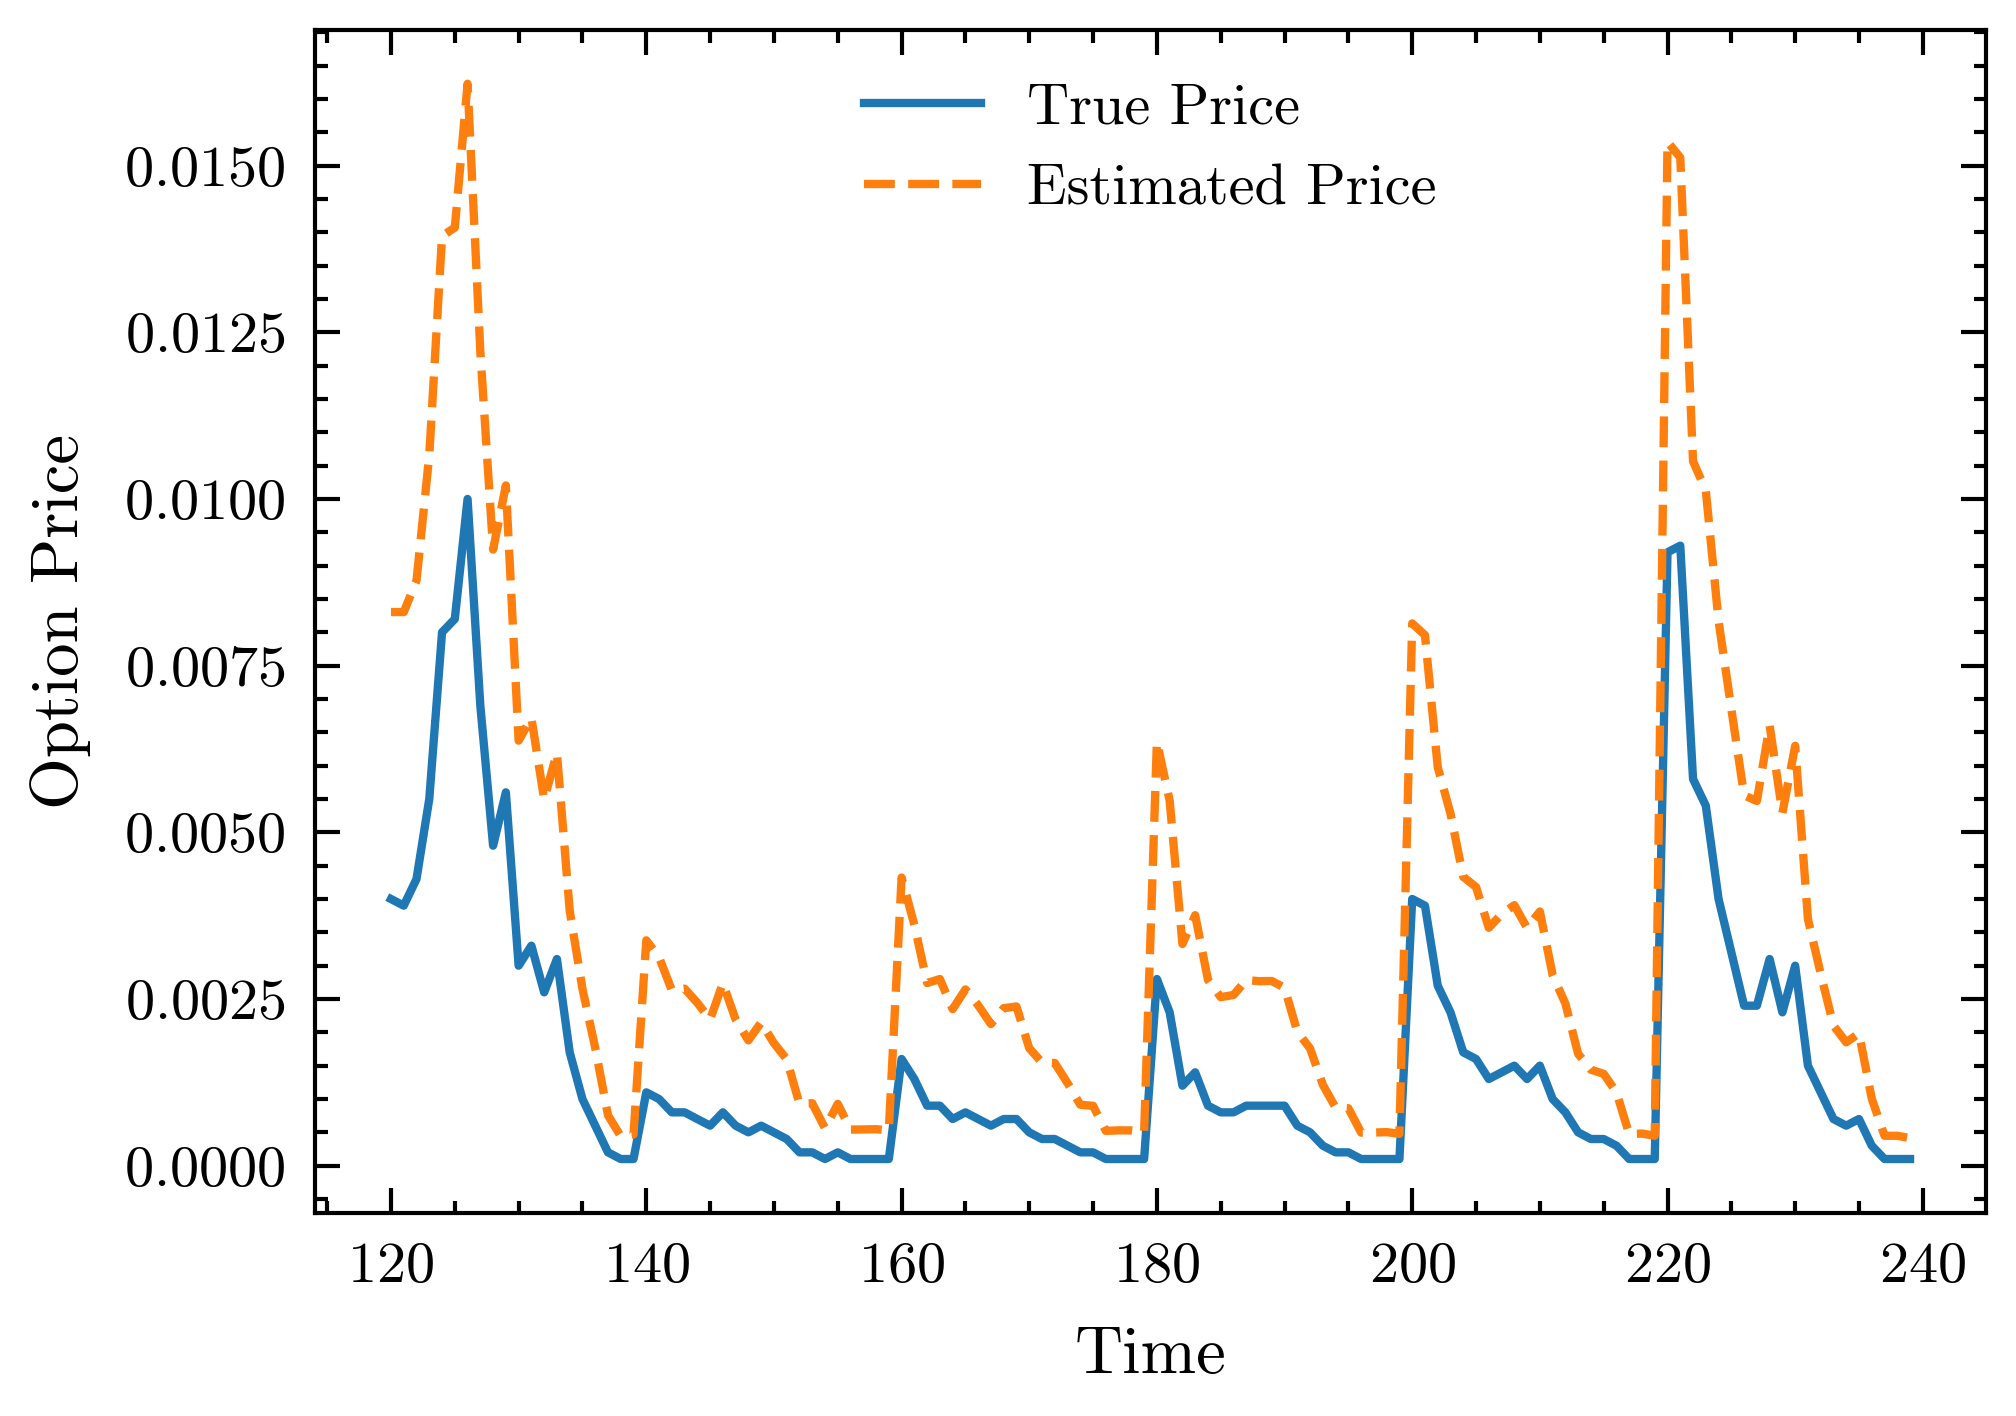

In [13]:
import matplotlib.pyplot as plt
from scienceplots import styles  # 导入样式库

# 启用 IEEE 样式 + 白色背景（无网格）
plt.style.use(["science", "ieee", "no-latex"])  # "no-latex" 避免依赖 LaTeX
plt.rcParams['grid.linewidth'] = 0  # 确保网格关闭

# 设置图表尺寸（IEEE 双栏宽度通常为 3.5 英寸，单栏为 7 英寸）
plt.figure(figsize=(3.5, 2.5))  # 双栏尺寸

plot_len = 120
begin_plot = 120

# 绘制数据
plt.plot(np.arange(begin_plot, begin_plot+plot_len), test_price[begin_plot:begin_plot + plot_len].numpy(), 
         color='#1f77b4', linewidth=1, label="True Price")  # IEEE 推荐黑白图
plt.plot(np.arange(begin_plot, begin_plot+plot_len), BS_price[begin_plot:begin_plot + plot_len].numpy(), 
         color='#ff7f0e', linestyle='--', linewidth=1, label="Estimated Price")

# 添加标签和标题（IEEE 推荐无标题，此处按需保留）
plt.xlabel('Time', fontsize=8)
plt.ylabel('Option Price', fontsize=8)
plt.legend(fontsize=7, frameon=False)  # 禁用图例边框

# 调整坐标轴字体和刻度
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# 紧凑布局
plt.tight_layout()

# 保存为矢量图（IEEE 推荐 .eps 或 .pdf）
plt.savefig("ieee_plot.pdf", bbox_inches='tight', dpi=300)
plt.show()

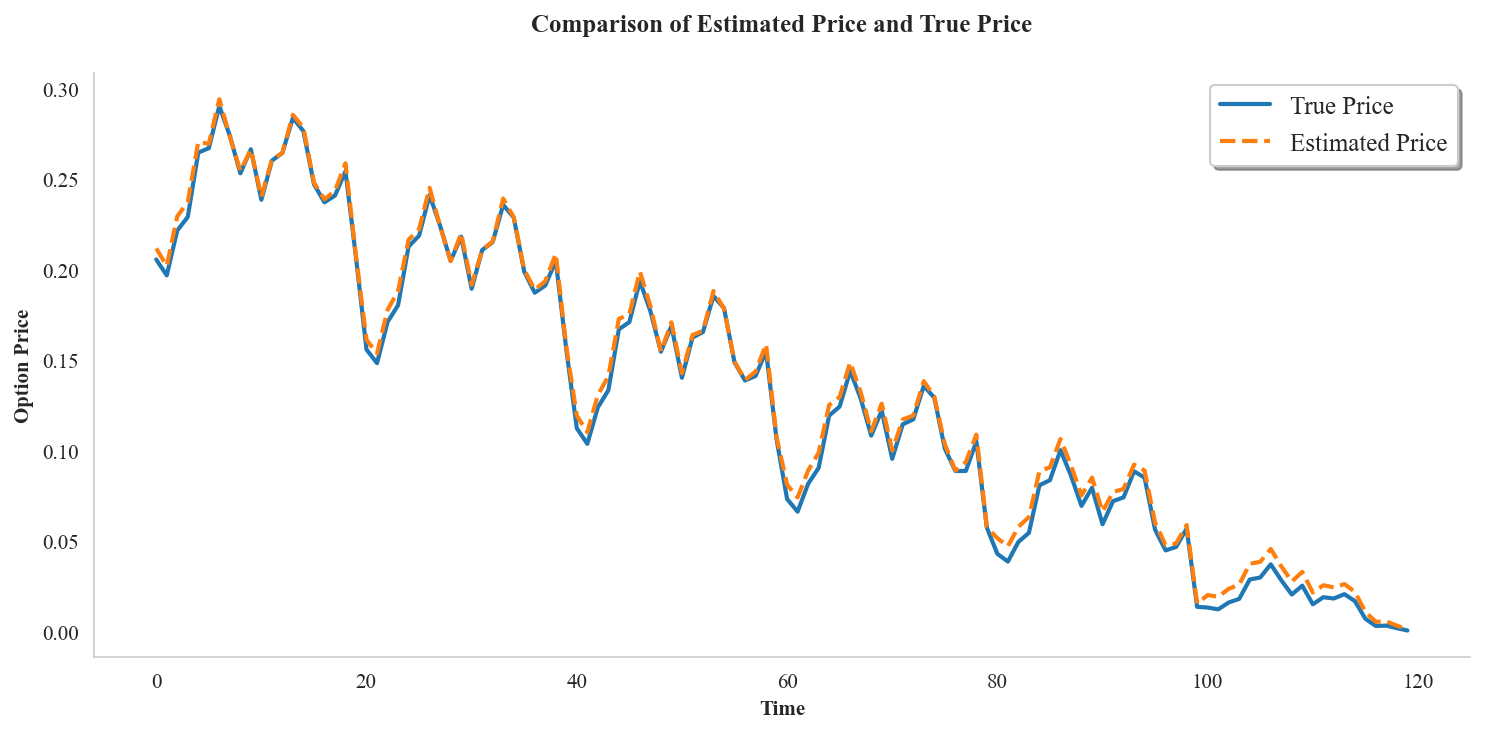

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置样式
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'figure.dpi': 150,
    'axes.titlepad': 20
})

# 绘制图像
plt.figure(figsize=(10, 5))
plt.plot(np.arange(plot_len), test_price[begin_plot:begin_plot + plot_len].numpy(), 
         color='#1f77b4', linewidth=2, label="True Price")
plt.plot(np.arange(plot_len), BS_price[begin_plot:begin_plot + plot_len].numpy(), 
         color='#ff7f0e', linestyle='--', linewidth=2, label="Estimated Price")

# 添加图例和标题
plt.legend(frameon=True, shadow=True, fontsize=12)
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Option Price', fontweight='bold')
plt.title("Comparison of Estimated Price and True Price", pad=20, fontweight='bold')

# 调整边框和网格
sns.despine(left=False, bottom=False)  # 保留坐标轴边框
plt.grid(False)

plt.tight_layout()  # 避免标签重叠
plt.show()

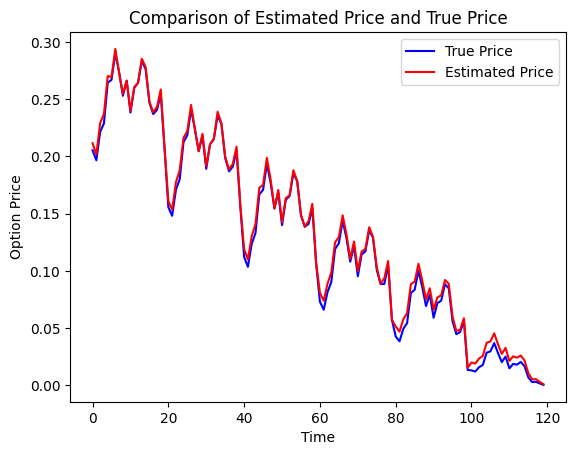

In [17]:
begin_plot = 0
plot_len = 120
plt.plot(np.arange(plot_len), test_price[begin_plot:begin_plot + plot_len].numpy(), color='blue', label="True Price")
plt.plot(np.arange(plot_len), BS_price[begin_plot:begin_plot + plot_len].numpy(), color='red', label="Estimated Price")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Option Price')
plt.title("Comparison of Estimated Price and True Price")

plt.show()